In [1]:
library(readr)

In [2]:
wine <- read_csv('wineR3_4.csv')

Rows: 178 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Class
dbl (4): Flavanoids, Hue, OD, Proline

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
wine$Class <- as.factor(wine$Class)

In [4]:
library(e1071)
library(GGally)
library(ggplot2)

Ładowanie wymaganego pakietu: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [5]:
str(wine)

spc_tbl_ [178 x 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Flavanoids: num [1:178] 3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Hue       : num [1:178] 1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD        : num [1:178] 3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ Proline   : num [1:178] 1065 1050 1185 1480 735 ...
 $ Class     : Factor w/ 3 levels "Low","Middle",..: 3 3 3 3 3 3 3 3 3 3 ...
 - attr(*, "spec")=
  .. cols(
  ..   Flavanoids = col_double(),
  ..   Hue = col_double(),
  ..   OD = col_double(),
  ..   Proline = col_double(),
  ..   Class = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [6]:
head(wine, 5)

Flavanoids,Hue,OD,Proline,Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.06,1.04,3.92,1065,Premium
2.76,1.05,3.40,1050,Premium
3.24,1.03,3.17,1185,Premium
3.49,0.86,3.45,1480,Premium
2.69,1.04,2.93,735,Premium


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


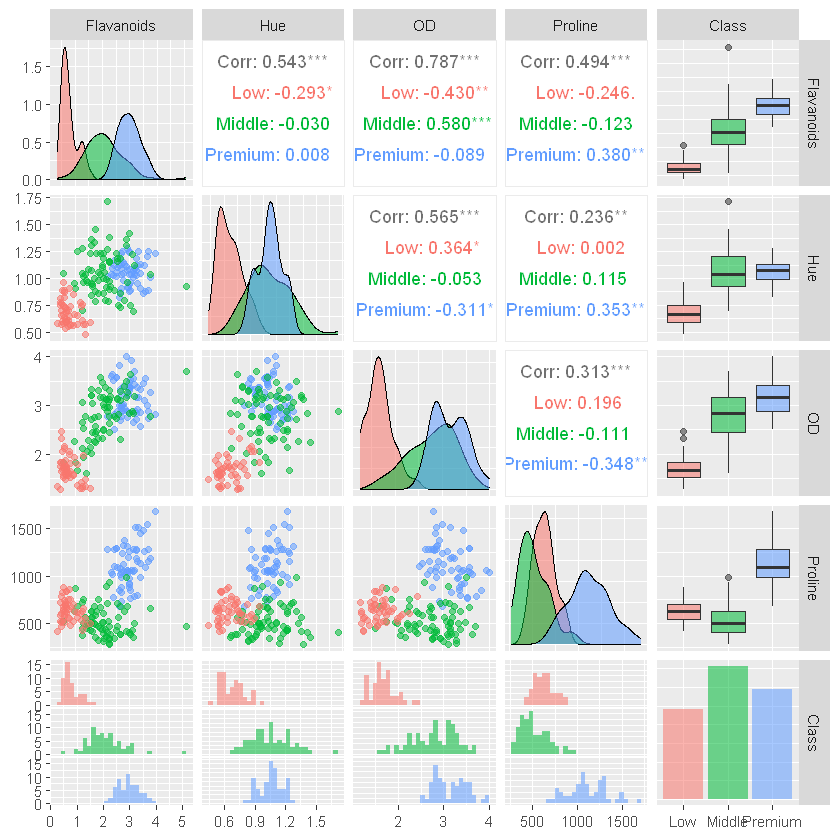

In [7]:
ggpairs(wine, ggplot2::aes(colour=Class, alpha=0.4))

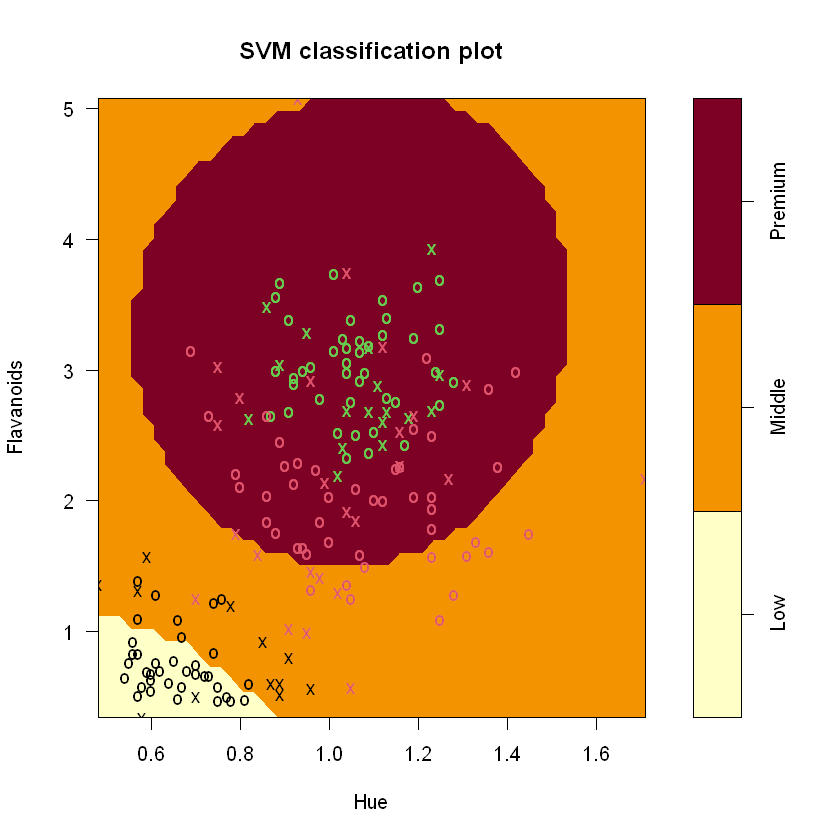

In [8]:
# RADIAL
svm_model <- svm(Class~., data=wine, type="C-classification",
                 kernel="radial")

plot(
    svm_model, 
    data=wine, 
    Flavanoids~Hue,
    slice=list(OD=3, Proline=1000)
)

In [9]:
# Predict each Class
# Confusion matrix and missclasscation Error and Accuracy

pred = predict(svm_model, wine)
tab = table(Predicted=pred, Actual=wine$Class)
tab

         Actual
Predicted Low Middle Premium
  Low      48      2       0
  Middle    0     65       2
  Premium   0      4      57

In [10]:
1-sum(diag(tab)/sum(tab)) # Missclasification error

[1] 0.04494382

In [11]:
sum(diag(tab)/sum(tab)) # Accuracy

[1] 0.9550562

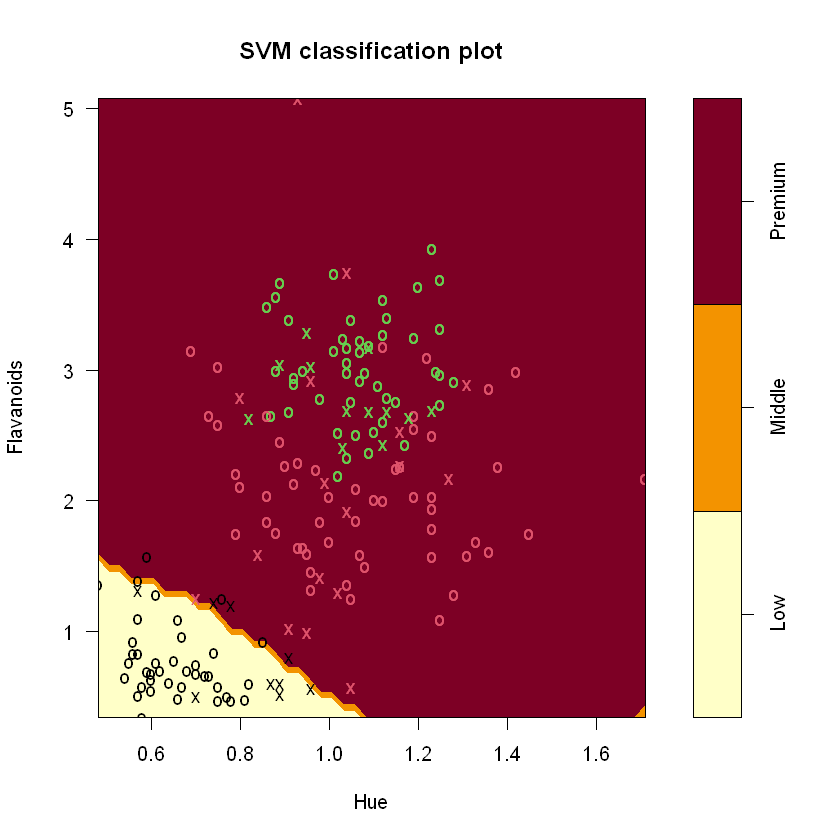

In [12]:
# LINEAR
svm_model <- svm(Class~., data=wine, type="C-classification",
                 kernel="linear")

plot(
    svm_model,
    data=wine,
    Flavanoids~Hue,
    slice = list(OD=3, Proline=1000)
)

In [13]:
pred = predict(svm_model, wine)
tab = table(Predicted=pred, Actual=wine$Class)
tab

         Actual
Predicted Low Middle Premium
  Low      48      3       0
  Middle    0     65       2
  Premium   0      3      57

In [14]:
1-sum(diag(tab)/sum(tab))

[1] 0.04494382

In [15]:
sum(diag(tab)/sum(tab))

[1] 0.9550562

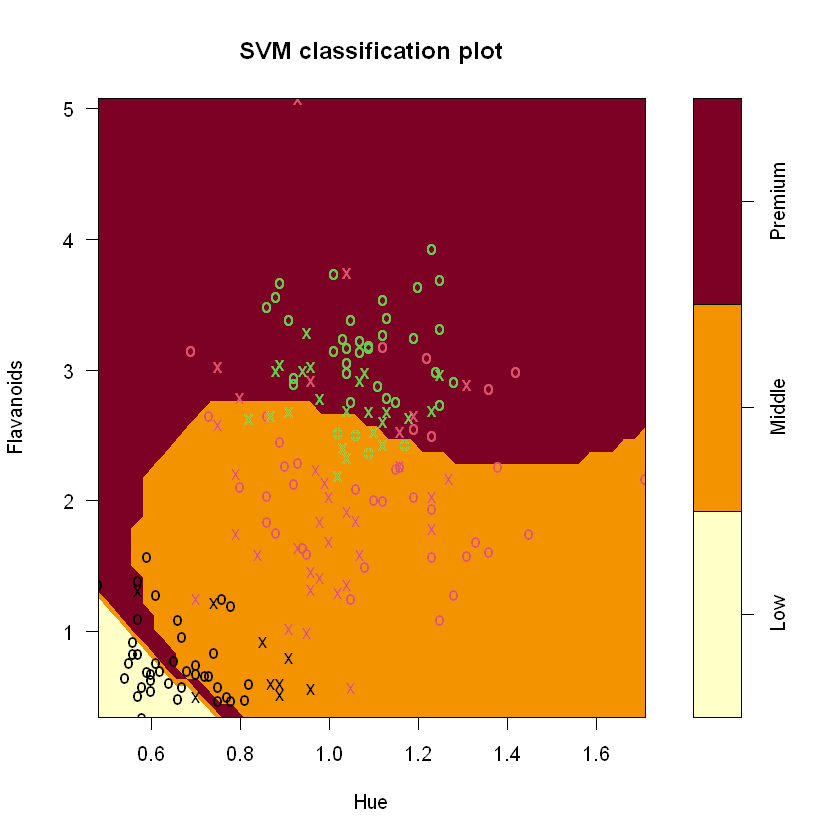

In [16]:
# POLYNOMIAL
svm_model <- svm(Class~., data=wine, type="C-classification",
                 kernel="poly")

plot(
    svm_model,
    data=wine,
    Flavanoids~Hue,
    slice = list(OD=3, Proline=1000)
)

In [17]:
pred = predict(svm_model, wine)
tab = table(Predicted=pred, Actual=wine$Class)
tab

         Actual
Predicted Low Middle Premium
  Low      47      0       0
  Middle    1     70       5
  Premium   0      1      54

In [18]:
1-sum(diag(tab)/sum(tab))

[1] 0.03932584

In [19]:
sum(diag(tab)/sum(tab))

[1] 0.9606742

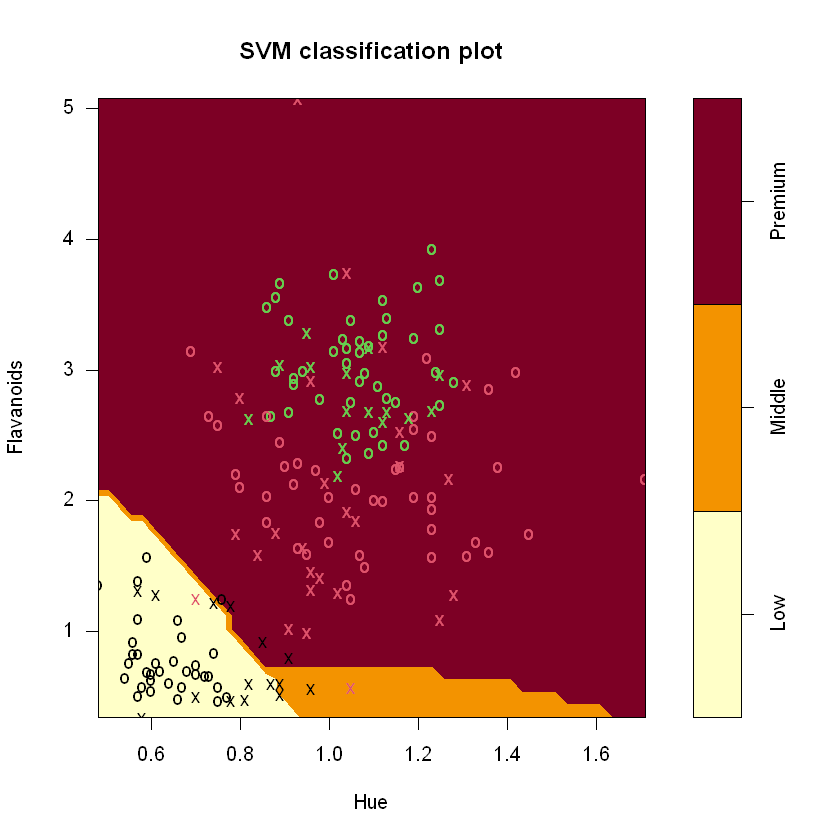

In [20]:
# SIGMOID
svm_model <- svm(Class~., data=wine, type="C-classification",
                 kernel="sigmoid")

plot(
    svm_model,
    data=wine,
    Flavanoids~Hue,
    slice = list(OD=3, Proline=1000)
)


In [21]:
pred = predict(svm_model, wine)
tab = table(Predicted=pred, Actual=wine$Class)
tab

         Actual
Predicted Low Middle Premium
  Low      48      6       0
  Middle    0     60       2
  Premium   0      5      57

In [22]:
1-sum(diag(tab)/sum(tab))

[1] 0.07303371

In [23]:
sum(diag(tab)/sum(tab))

[1] 0.9269663

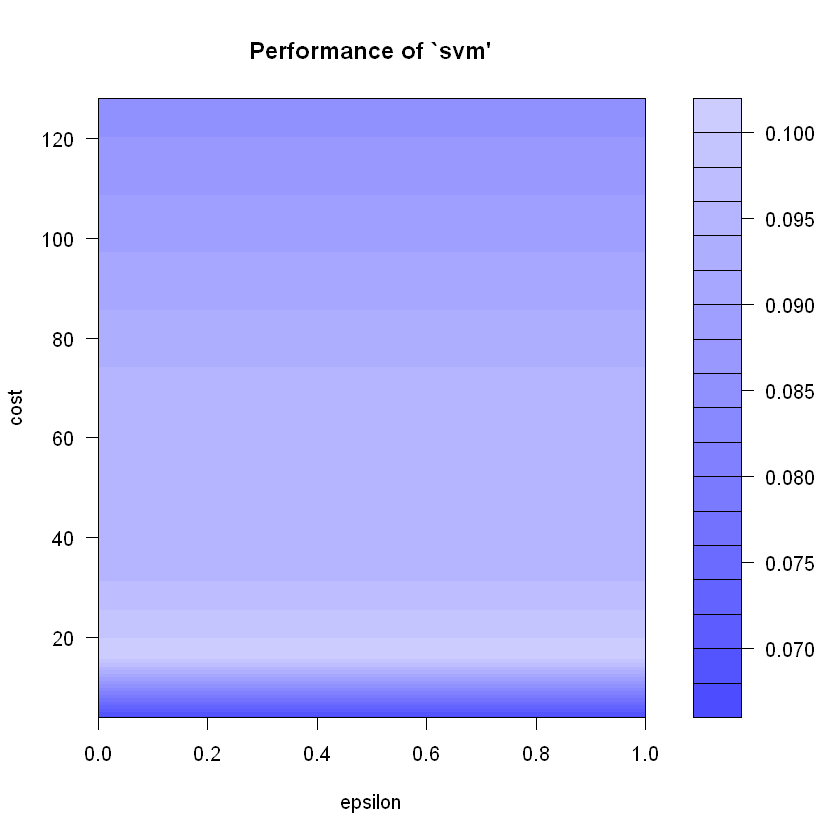

In [24]:
# Parameter Tunning
set.seed(123)
tmodel = tune(type="C-classification", svm, Class~., data=wine,
              ranges = list(epsilon=seq(0,1,0.1), cost=2^(2:7)))
plot(tmodel)

In [25]:
summary(tmodel)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon cost
       0    4

- best performance: 0.06732026 

- Detailed performance results:
   epsilon cost      error dispersion
1      0.0    4 0.06732026 0.04460116
2      0.1    4 0.06732026 0.04460116
3      0.2    4 0.06732026 0.04460116
4      0.3    4 0.06732026 0.04460116
5      0.4    4 0.06732026 0.04460116
6      0.5    4 0.06732026 0.04460116
7      0.6    4 0.06732026 0.04460116
8      0.7    4 0.06732026 0.04460116
9      0.8    4 0.06732026 0.04460116
10     0.9    4 0.06732026 0.04460116
11     1.0    4 0.06732026 0.04460116
12     0.0    8 0.07875817 0.04724329
13     0.1    8 0.07875817 0.04724329
14     0.2    8 0.07875817 0.04724329
15     0.3    8 0.07875817 0.04724329
16     0.4    8 0.07875817 0.04724329
17     0.5    8 0.07875817 0.04724329
18     0.6    8 0.07875817 0.04724329
19     0.7    8 0.07875817 0.04724329
20     0.8    8 0.07875817 0.04724329
21     0.9    

In [26]:
# Best Model
mymodel = tmodel$best.model
summary(mymodel)


Call:
best.tune(METHOD = svm, train.x = Class ~ ., data = wine, ranges = list(epsilon = seq(0, 
    1, 0.1), cost = 2^(2:7)), type = "C-classification")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  4 

Number of Support Vectors:  45

 ( 14 19 12 )


Number of Classes:  3 

Levels: 
 Low Middle Premium




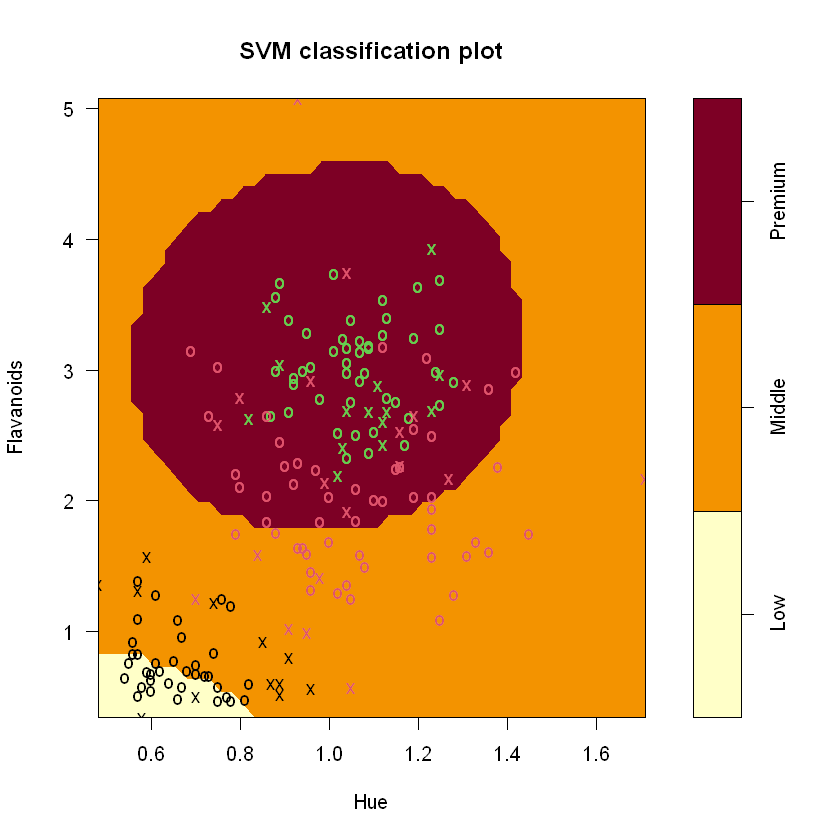

In [27]:
# Radial model was selected as the best

plot(
    mymodel,
    data=wine,
    Flavanoids~Hue,
    slice = list(OD=3, Proline=1000)
)

In [28]:
# Confusion matrix and missclassification rate and accuracy using best parameter
pred1 = predict(mymodel, wine)
tab1 = table(Predicted=pred1, Actual=wine$Class)
tab1

         Actual
Predicted Low Middle Premium
  Low      48      1       0
  Middle    0     66       1
  Premium   0      4      58

In [29]:
1-sum(diag(tab1)/sum(tab1))

[1] 0.03370787

In [30]:
sum(diag(tab1)/sum(tab1))

[1] 0.9662921